# 機器學習競賽專案：Space Titanic🚀
---
## 為何選擇這個主題❓ 🤔  
純粹是為這個主題非常適合剛開始練習機器學習專案的新手。😁
## 這個競賽要解決什麼樣的問題❓ 🤔
我們要預測有哪些在飛船上的乘客會被傳送到其他維度的空間  
所以要解決的是分類問題。😎
## 專案流程 ✅
### EDA資料探索→特徵工程→數據預處理→模型選取→模型評估→集成式學習→提交結果

---

## 載入資料與初始環境設定

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 載入資料
train = pd.read_csv("space_titanic_train.csv")
test = pd.read_csv("space_titanic_test.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## EDA探索式資料分析 

In [2]:
# 觀察資料的型別、缺失值、欄位數量
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
# 觀察各欄位缺失值數量
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
# 觀察重複的行
print('重複行的數量：', train.duplicated().sum())

重複行的數量： 0


> 我們觀察到幾乎所有欄位都有缺失值，有許多欄位為類別型欄位<br>
而這筆數據中沒有任何一行是重複的

### 觀察目標變量

Transported
True     4378
False    4315
Name: count, dtype: int64

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

<Axes: ylabel='count'>

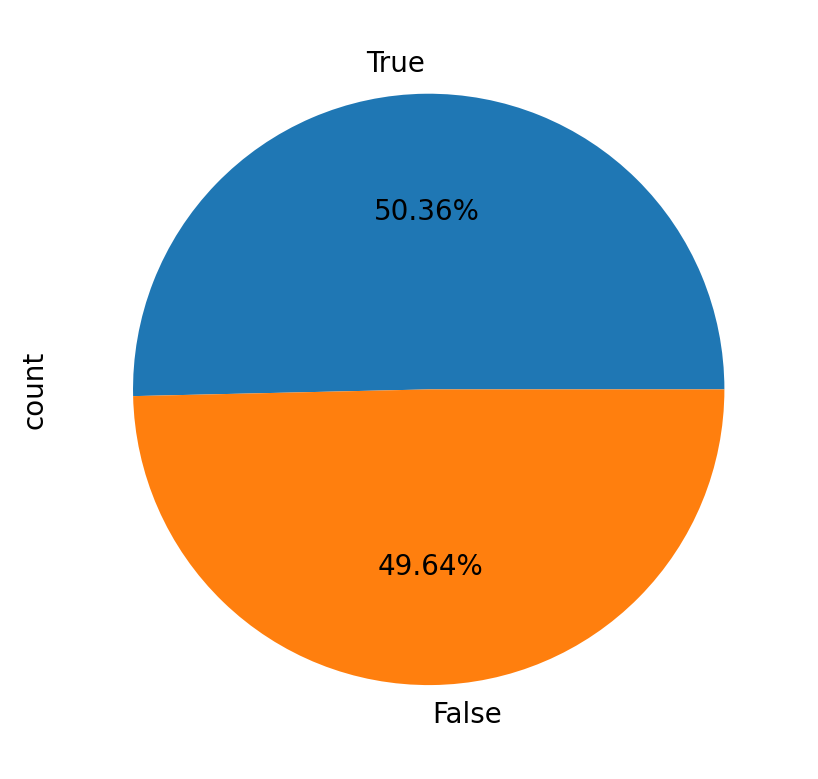

In [5]:
# 觀察目標變數Transported
y = train['Transported']
y_counts = y.value_counts()
y_pct = y.value_counts(normalize = True)
display(y_counts)
display(y_pct)
y.value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

> 我們可以觀察到，在目標變數中沒有不平衡的情況發生，這是好事

### 探索數值型欄位

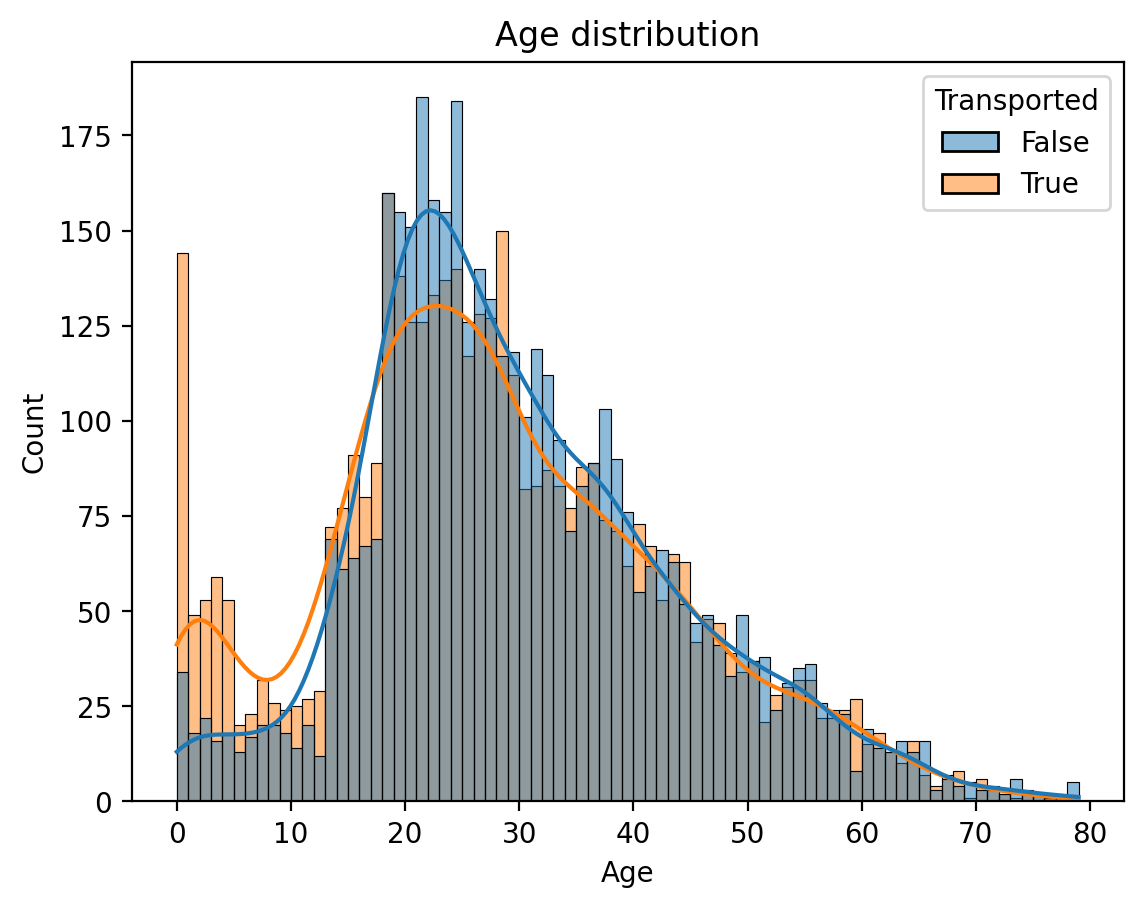

In [6]:
# 觀察年齡與目標變數的分布
sns.histplot(data = train, x = 'Age', hue = 'Transported', kde = True, binwidth = 1)
plt.title("Age distribution");

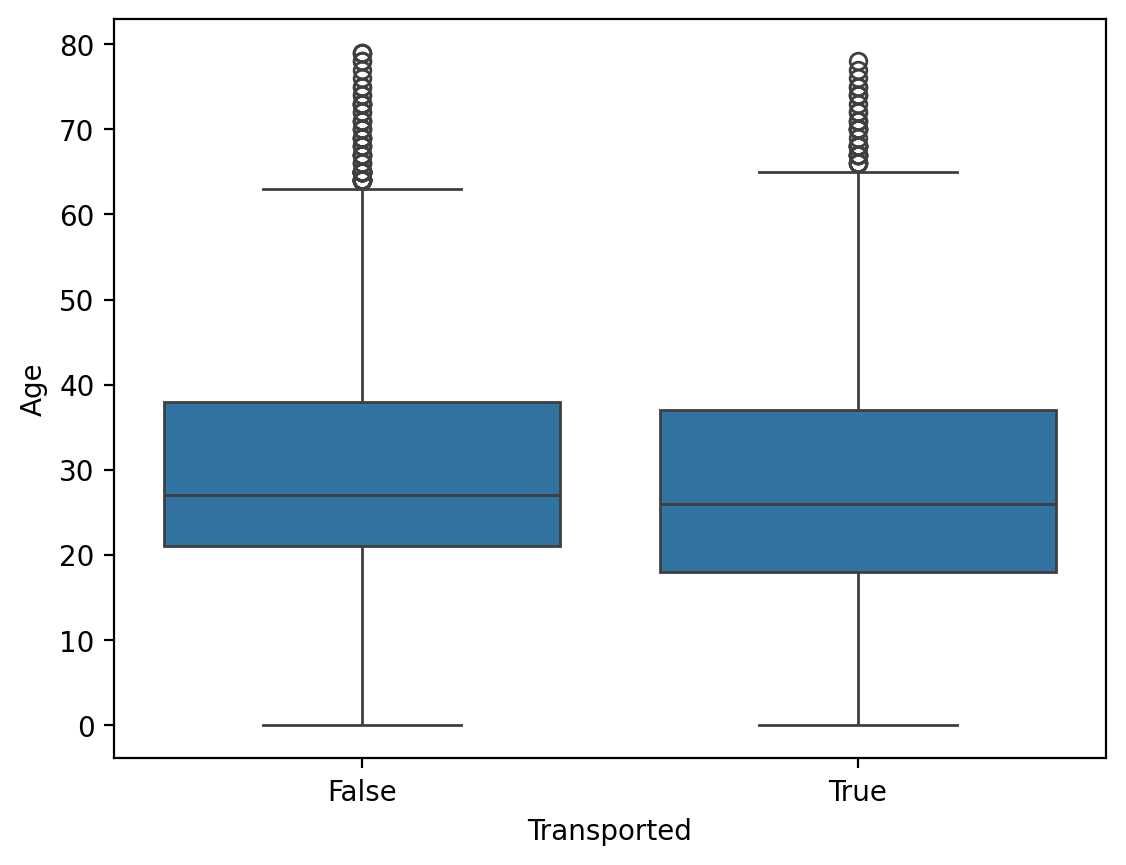

In [7]:
# 用箱型圖展示被傳送和未被傳送乘客的年齡分佈
sns.boxplot(x = 'Transported', y = 'Age', data = train);

> 從以上的圖表我們可以觀察到，年紀較小的乘客似乎更容易被傳送走，或許我們<br>
可以創造一個新的特徵將不同年齡層的乘客分組

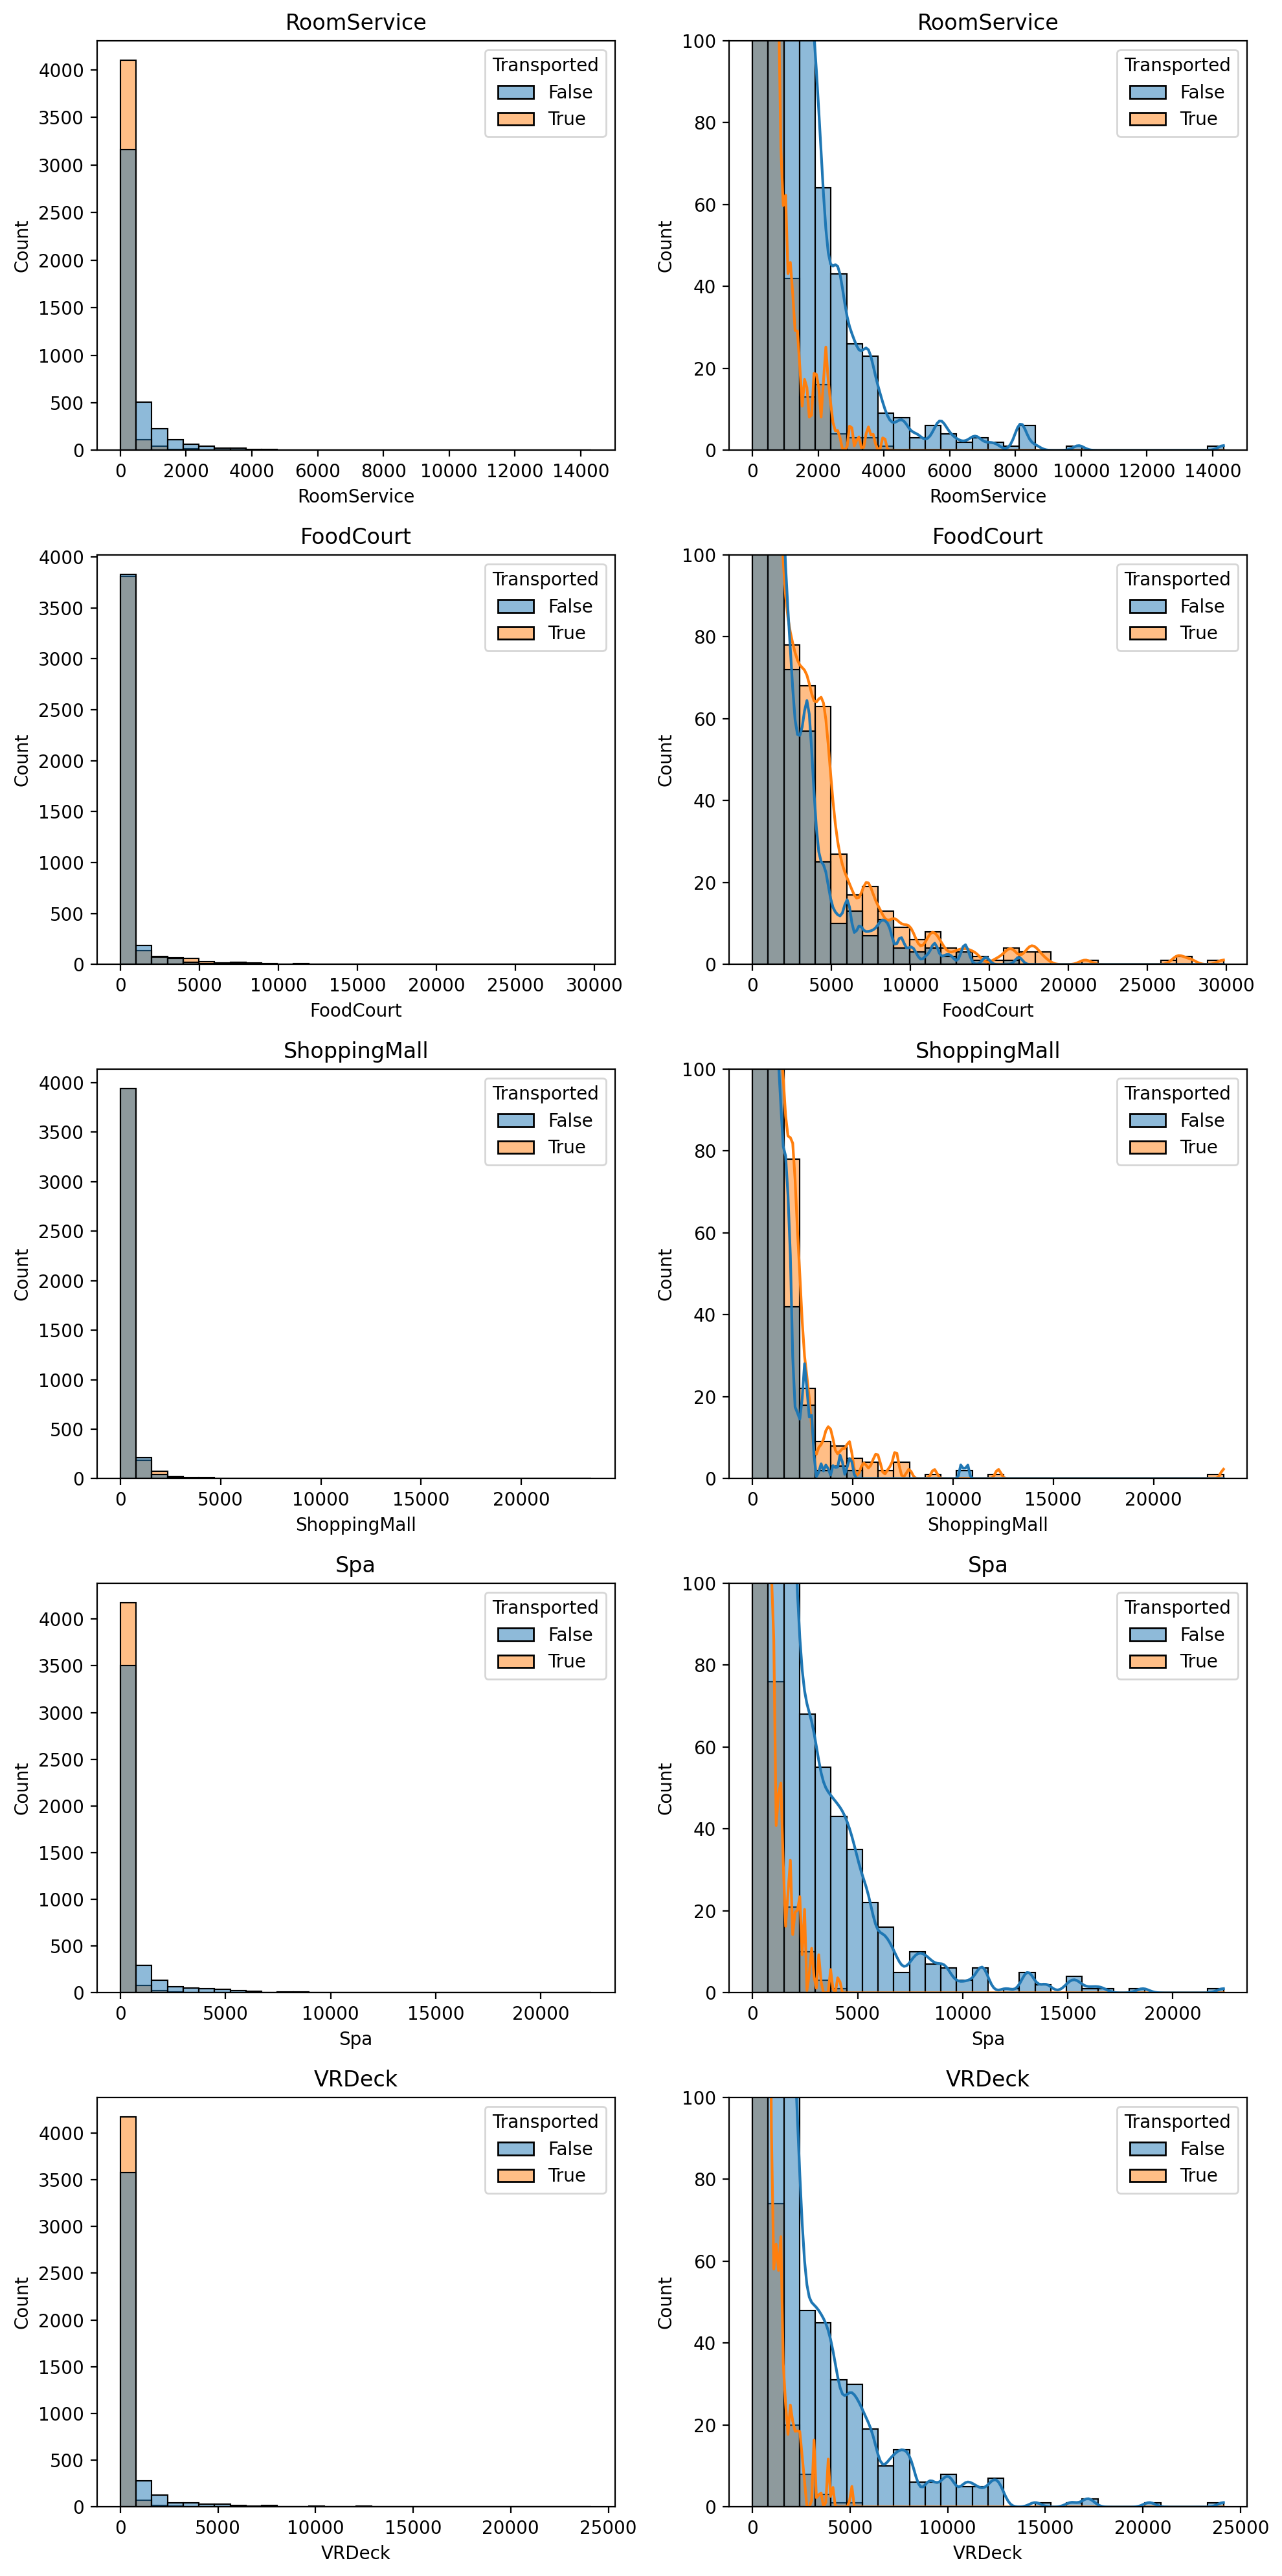

In [8]:
# 繪製出消費型特徵與目標變數的分布
exp_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig = plt.figure(figsize = (10, 20))
for i, feature_name in enumerate(exp_features):
    # 左邊的圖
    ax = fig.add_subplot(5, 2, 2 * i + 1)
    sns.histplot(data = train, x = feature_name, axes = ax, bins = 30, hue = 'Transported')
    ax.set_title(feature_name)

    # 右邊的圖，將y值的範圍縮小
    ax = fig.add_subplot(5, 2, 2 * i + 2)
    sns.histplot(data = train, x = feature_name, axes = ax, bins = 30, kde = True, hue = 'Transported')
    plt.ylim([0, 100])
    ax.set_title(feature_name)

fig.tight_layout()

> 透過以上圖表可以觀察到，消費者的花費大多數都不會太高，但有少數的離群值<br>
而會被傳送的大部分都是花費較少的乘客，在特徵工程的部分或許多們可以將所有消費<br>
整合成一個欄位，也能觀察不消費和消費的乘客在目標變數上有沒有什麼顯著的不同

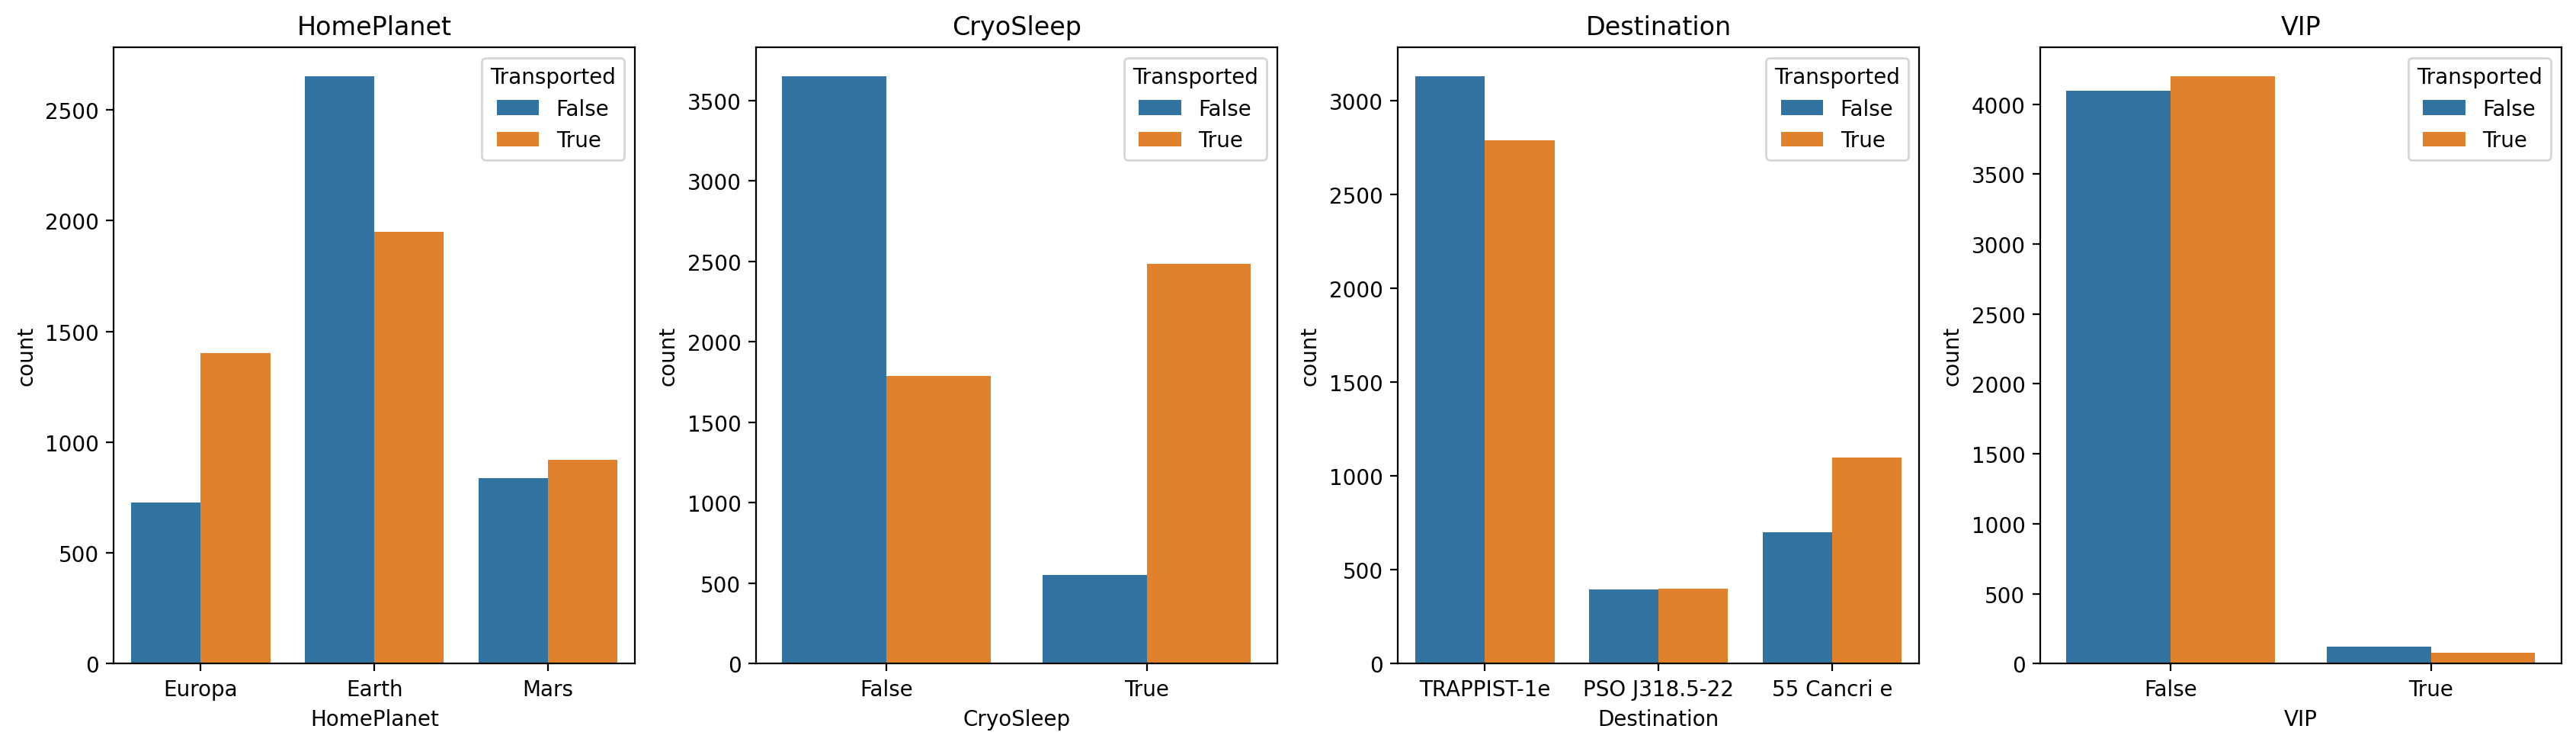

In [9]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig = plt.figure(figsize = (17, 5))
for i, f_name in enumerate(cat_features):
    ax = fig.add_subplot(1, 4, i + 1)
    sns.countplot(data = train, x = f_name, axes = ax, hue = 'Transported')
    ax.set_title(f_name)
    
fig.tight_layout()

> 從以上的圖表我們發現，有進行冷凍睡眠的人有很大的比例被傳送走了，而我們看到大部分的人不是VIP，目標變數的分佈也比較平均

> 從以上的圖表我們可以觀察到，進行冷凍睡眠的人有很大的比例被傳送走了，<br>
而VIP這個特徵呈現出大多數人都不是VIP，目標變數的比例也比較平均

## 特徵工程
---

> 現在開始我們會根據EDA的結果製作出一些新的特徵，創造出這些特徵後<br>
我們會一起進行資料預處理

### 將年齡分組

In [10]:
# 定義年齡分組與分界點
bins = [0, 13, 18, 35, 50, float('inf')]
labels = ['Child', 'Young', 'Young Adult', 'Adult', 'Old']

# 在訓練集與測試集上分組
train['Age_Group'] = pd.cut(train['Age'], bins = bins, labels = labels, right = True, include_lowest = True)
test['Age_Group'] = pd.cut(train['Age'], bins = bins, labels = labels, right = True, include_lowest = True)

print("訓練集 Age_Group分佈：\n", train['Age_Group'].value_counts())
print("測試集 Age_Group分佈：\n", test['Age_Group'].value_counts())

訓練集 Age_Group分佈：
 Age_Group
Young Adult    4136
Adult          1776
Child           947
Young           918
Old             737
Name: count, dtype: int64
測試集 Age_Group分佈：
 Age_Group
Young Adult    2005
Adult           879
Child           473
Young           442
Old             386
Name: count, dtype: int64


Text(0.5, 1.0, 'Age group distribution')

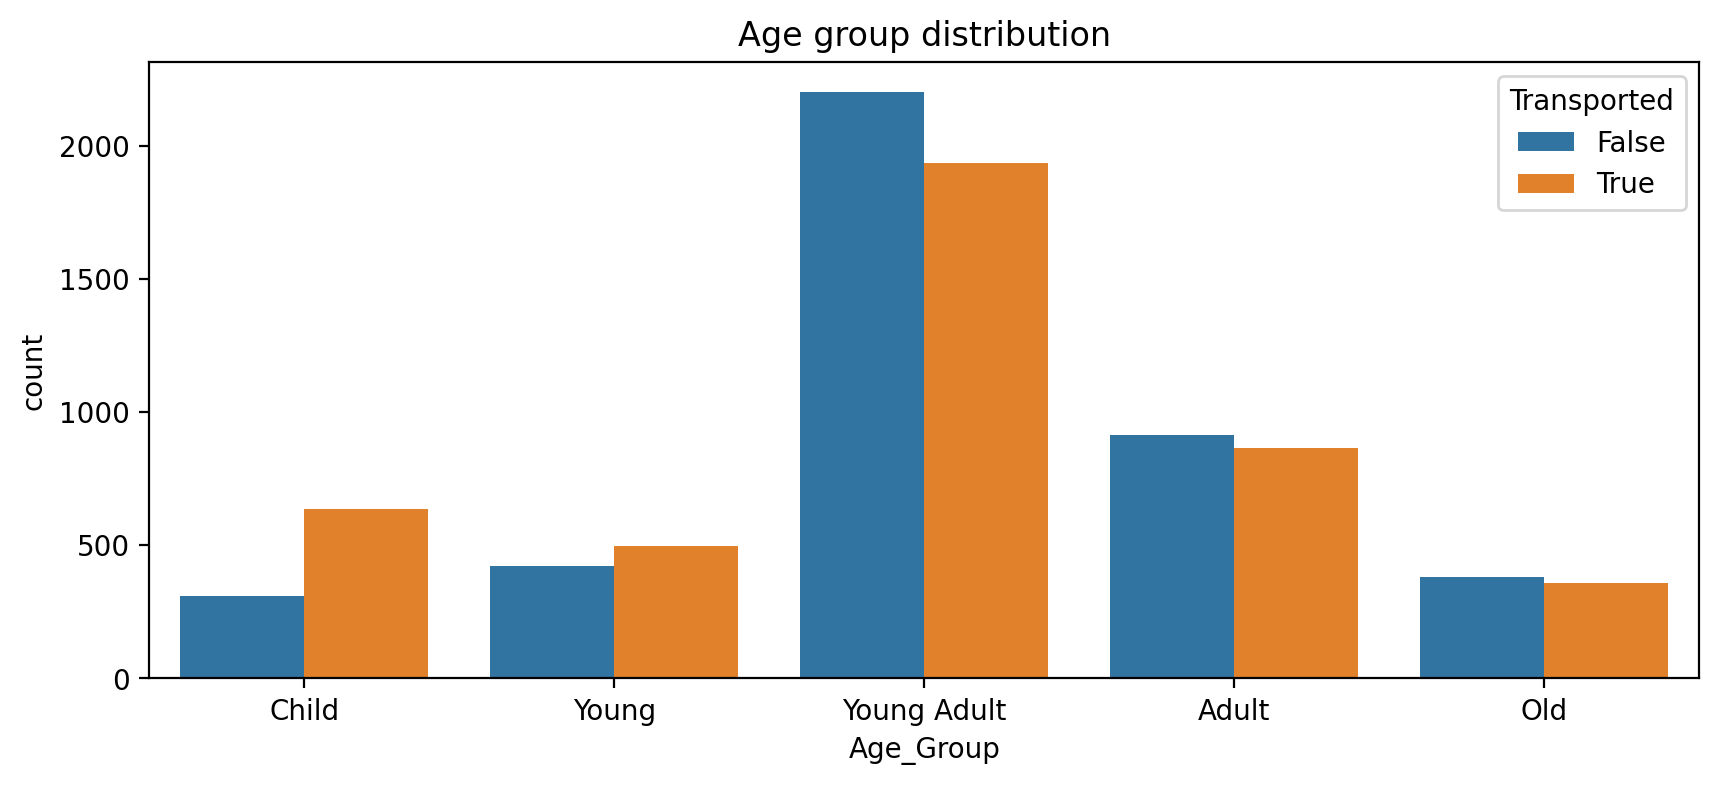

In [11]:
# 繪製新特徵的散布圖
plt.figure(figsize = (10, 4))
sns.countplot(data = train, x = 'Age_Group', hue = 'Transported',
              order = ['Child', 'Young', 'Young Adult', 'Adult', 'Old']);
plt.title("Age group distribution")

> 我們可以觀察到，年紀較小的人被傳走的比例比同年齡層沒被傳走的高
### 創建關於消費的新特徵

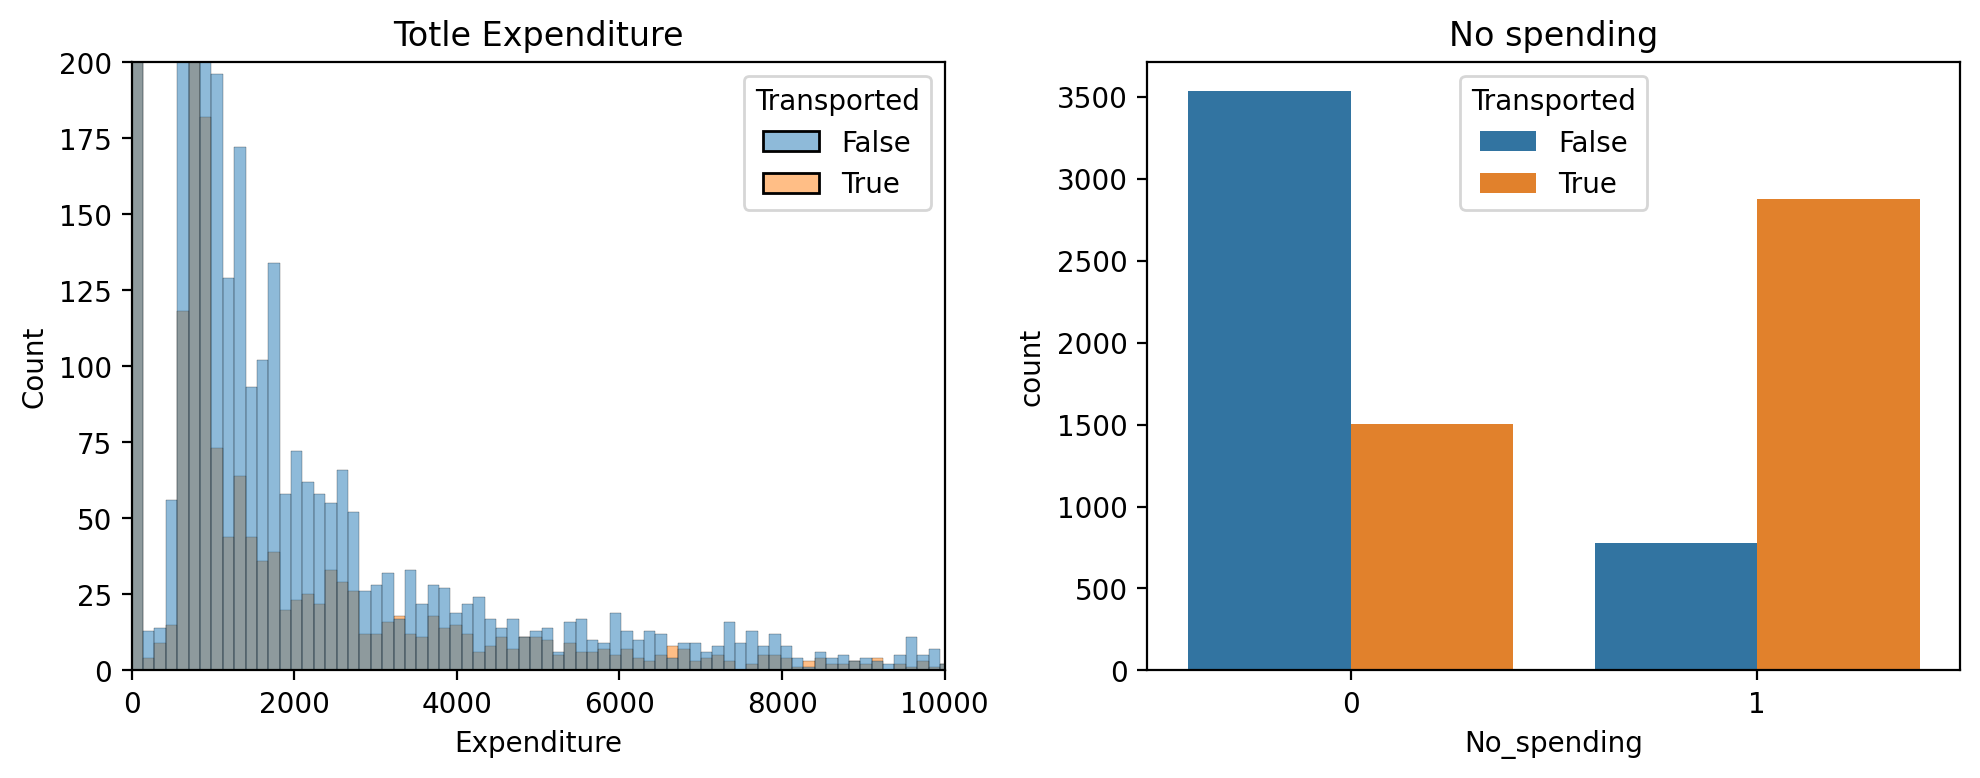

In [12]:
# 總合所有的消費金額
train['Expenditure'] = train[exp_features].sum(axis = 1)
test['Expenditure'] = test[exp_features].sum(axis = 1)

# 區分有消費與未消費的乘客
train['No_spending'] = (train['Expenditure'] == 0).astype(int)
test['No_spending'] = (test['Expenditure'] == 0).astype(int)

# 繪製新特徵的分布圖
fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data = train, x = 'Expenditure', hue = 'Transported')
plt.title('Totle Expenditure')
plt.ylim([0, 200])
plt.xlim([0, 10000])

plt.subplot(1, 2, 2)
sns.countplot(data = train, x = 'No_spending', hue = 'Transported')
plt.title('No spending')
fig.tight_layout()

### 將Cabin分為不同部分

/var/folders/4l/gjb3srws2nl2mtpznp4m5kkw0000gn/T/ipykernel_76845/1676215495.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Cabin'].fillna('!/9999/!', inplace = True)
/var/folders/4l/gjb3srws2nl2mtpznp4m5kkw0000gn/T/ipykernel_76845/1676215495.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

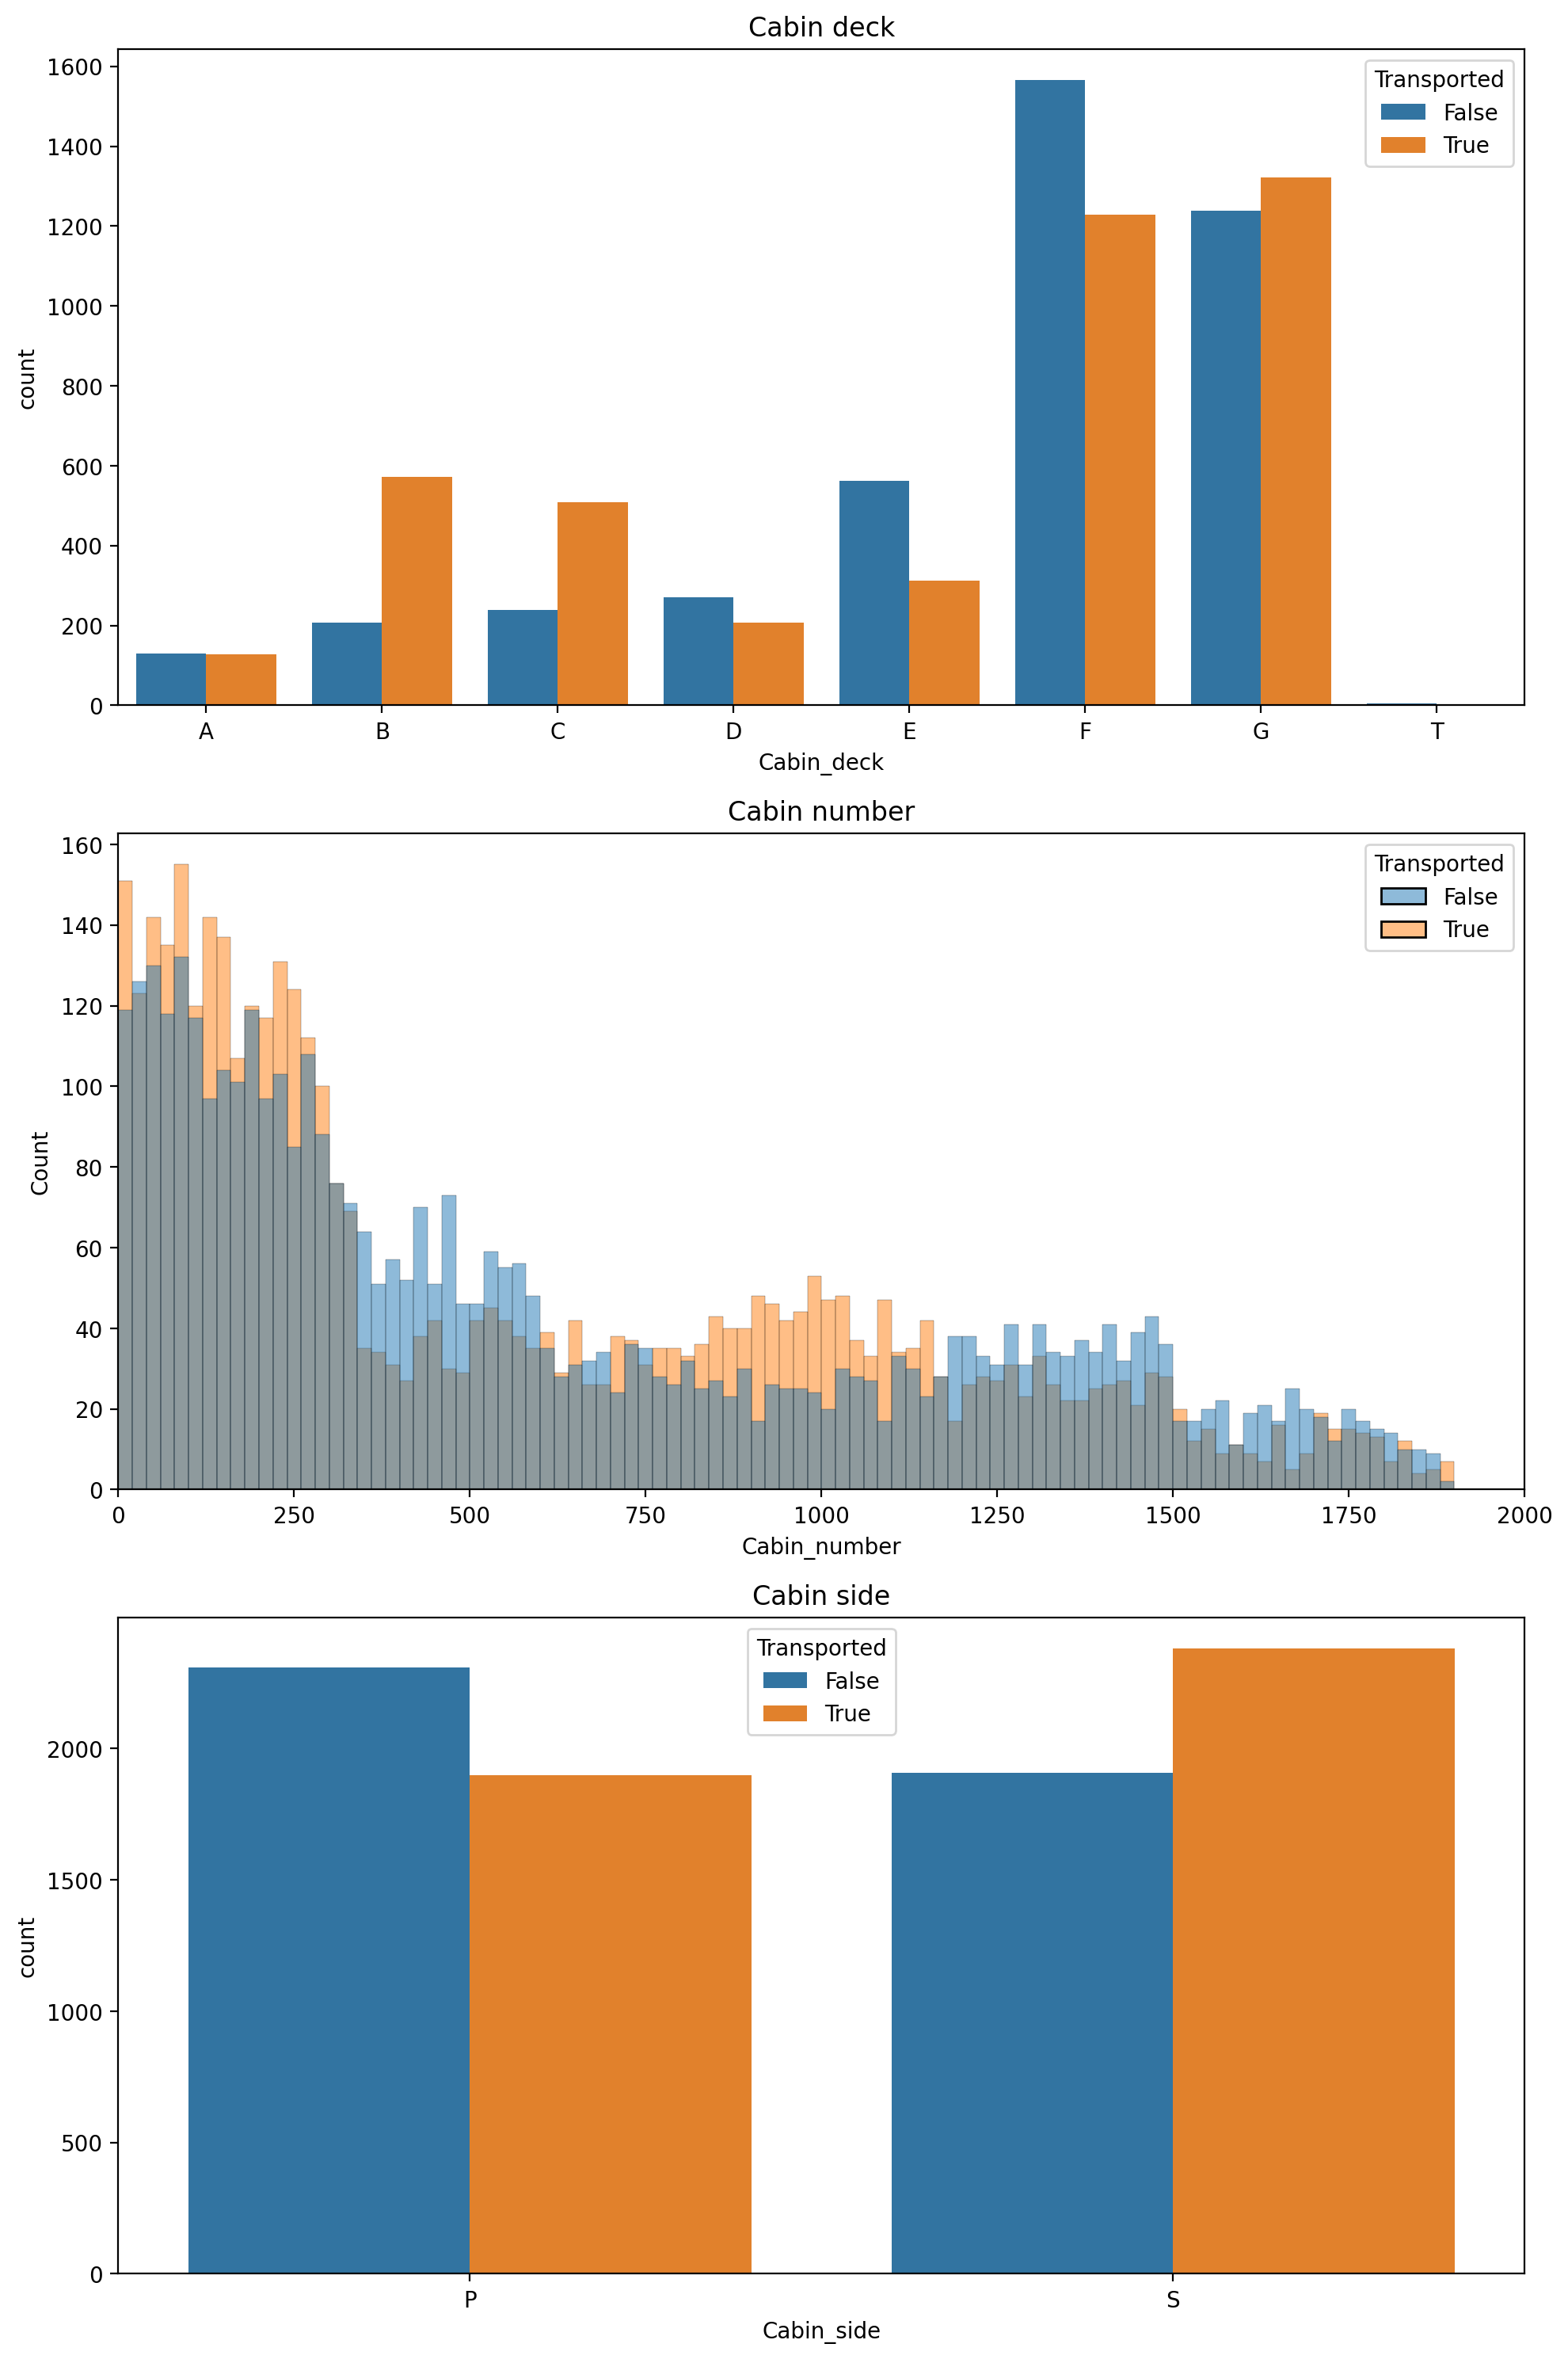

In [13]:
# 填補缺失值以便之後的分割與型態轉換
train['Cabin'].fillna('!/9999/!', inplace = True)
test['Cabin'].fillna('!/9999/!', inplace = True)

# 拆分訓練集特徵值
train['Cabin_deck'] = train['Cabin'].str.split('/').str[0]
train['Cabin_number'] = train['Cabin'].str.split('/').str[1].astype(int)
train['Cabin_side'] = train['Cabin'].str.split('/').str[2]

# 拆分測試集特徵值
test['Cabin_deck'] = test['Cabin'].str.split('/').str[0]
test['Cabin_number'] = test['Cabin'].str.split('/').str[1].astype(int)
test['Cabin_side'] = test['Cabin'].str.split('/').str[2]

# 將原本的缺失值放回，等等再進行處理
train.loc[train['Cabin_deck'] == '!', 'Cabin_deck'] = np.nan
train.loc[train['Cabin_number'] == '9999', 'Cabin_number'] = np.nan
train.loc[train['Cabin_side'] == '!', 'Cabin_side'] = np.nan
test.loc[test['Cabin_deck'] == '!', 'Cabin_deck'] = np.nan
test.loc[test['Cabin_number'] == '9999', 'Cabin_number'] = np.nan
test.loc[test['Cabin_side'] == '!', 'Cabin_side'] = np.nan

# 將Cabin欄位去除，因為我們已經創造出另外三個更有用特徵了
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

# 繪製新特徵的分布圖
fig = plt.figure(figsize = (10, 15))

# 繪製Cabin_deck分佈
plt.subplot(3, 1, 1)
sns.countplot(data = train, x = 'Cabin_deck', hue = 'Transported', 
              order = ['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

# 繪製Cabin_number分佈
plt.subplot(3, 1, 2)
sns.histplot(data = train, x = 'Cabin_number', hue = 'Transported', binwidth = 20)
plt.xlim([0, 2000])
plt.title('Cabin number')

# 繪製Cabin_side分佈
plt.subplot(3, 1, 3)
sns.countplot(data = train, x = 'Cabin_side', hue = 'Transported')
plt.title('Cabin side')
fig.tight_layout()

> 等等，在我們對Cabin欄位進行特徵工程並畫出分佈圖後，我們發現到Cabin_number的圖表似乎<br>
顯示出了某種資訊，我們可以觀察到在分佈圖的某些區段被傳送的人比未被傳送的人還多，有些區段則<br>
比較少，這告訴我們似乎可以將Cabin_number的數值分成好幾組，讓它變成類別型特徵

### 將Cabin_number拆分成多個區域

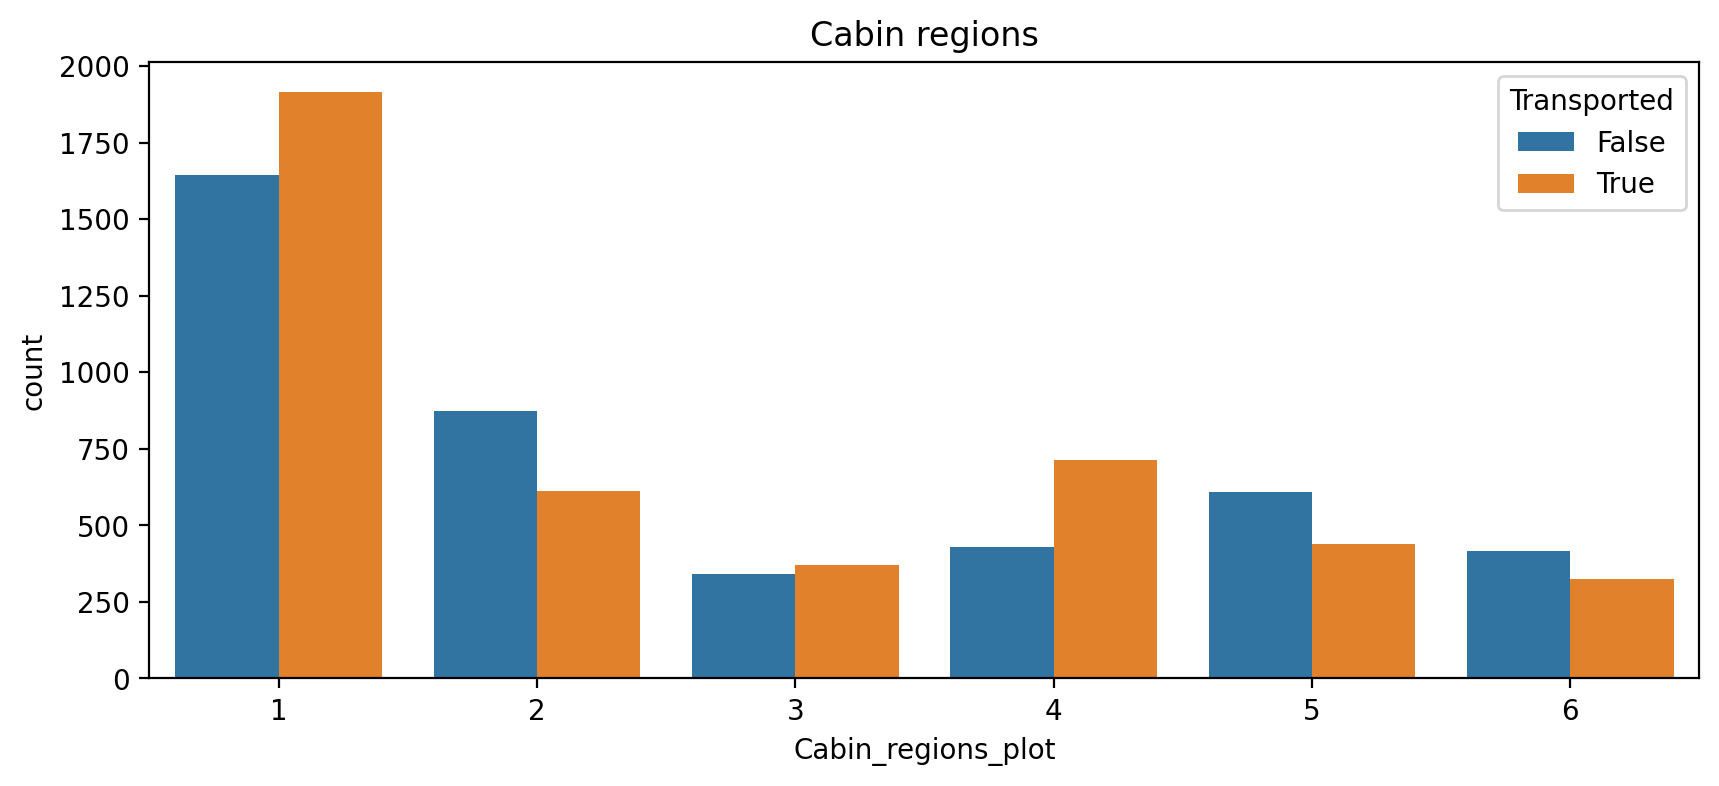

In [14]:
# 將Cabin分成6個區域，同時進行one-hot encoding
train['Cabin_region1'] = (train['Cabin_number'] < 300).astype(int)
train['Cabin_region2'] = ((train['Cabin_number'] >= 300) & (train['Cabin_number'] < 600)).astype(int)
train['Cabin_region3'] = ((train['Cabin_number'] >= 600) & (train['Cabin_number'] < 820)).astype(int)
train['Cabin_region4'] = ((train['Cabin_number'] >= 820) & (train['Cabin_number'] < 1160)).astype(int)
train['Cabin_region5'] = ((train['Cabin_number'] >= 1160) & (train['Cabin_number'] < 1500)).astype(int)
train['Cabin_region6'] = (train['Cabin_number'] >= 1500).astype(int)

# 對測試集進行操作
test['Cabin_region1'] = (test['Cabin_number'] < 300).astype(int)
test['Cabin_region2'] = ((test['Cabin_number'] >= 300) & (test['Cabin_number'] < 600)).astype(int)
test['Cabin_region3'] = ((test['Cabin_number'] >= 600) & (test['Cabin_number'] < 820)).astype(int)
test['Cabin_region4'] = ((test['Cabin_number'] >= 820) & (test['Cabin_number'] < 1160)).astype(int)
test['Cabin_region5'] = ((test['Cabin_number'] >= 1160) & (test['Cabin_number'] < 1500)).astype(int)
test['Cabin_region6'] = (test['Cabin_number'] >= 1500).astype(int)

# 將新特徵與目標變數的關係繪製出來。
# 為了能夠繪圖而創造出了新的欄位，會進行以下運算是因為1-6區域欄位內容都是1與0，繪圖時需結合所有欄位並實際反映出每位乘客的確切區域
plt.figure(figsize = (10, 4)) 
train['Cabin_regions_plot'] = (train['Cabin_region1'] + 2 * train['Cabin_region2'] +
                               3 * train['Cabin_region3'] + 4 * train['Cabin_region4'] + 
                               5 * train['Cabin_region5'] + 6 * train['Cabin_region6'])
sns.countplot(data = train, x = 'Cabin_regions_plot', hue = 'Transported')
plt.title('Cabin regions')
train.drop('Cabin_regions_plot', axis = 1, inplace = True)

## 資料預處理
---
### 處理缺失值 

In [15]:
y = train['Transported'].copy().astype(int)
X = train.drop('Transported', axis = 1).copy()

In [16]:
# 觀察具有缺失值的欄位
ms_col = train.columns[train.isna().any()].tolist() 
ms_df = pd.DataFrame(X[ms_col].isna().sum(), columns = ['count_missing'])
ms_df

,count_missing
HomePlanet,201
CryoSleep,217
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer

# 分離數值型與類別型欄位
num_cols = X[ms_col].select_dtypes(include = ['int', 'float']).columns
cat_cols = X[ms_col].select_dtypes(include = ['object', 'category']).columns

# 建立數值與類別填補器
num_transformer = KNNImputer(n_neighbors = 5)
cat_transformer = SimpleImputer(strategy = 'most_frequent')

# 使用ColumnTransformer組合不同型別欄位的處理方法
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_cols), 
        ('cat', cat_transformer, cat_cols)
    ]
)
# 在訓練集上擬合並轉換
x_processed = preprocessor.fit_transform(X)
x_processed = pd.DataFrame(x_processed, 
                           columns = list(num_cols) + list(cat_cols))

# 將訓練集擬合結果換到測試集上避免數據洩露
test_processed = preprocessor.transform(test)
test_processed = pd.DataFrame(test_processed, 
                         columns = list(num_cols) + list(cat_cols))

# 合併具有缺失值的數值與類別欄位並修改原數據
missing_cols = list(num_cols) + list(cat_cols)
for col in missing_cols:
    X[col] = x_processed[col]
    test[col] = test_processed[col]

## 對數轉換
---

In [18]:
# 去除不必要的特徵
X.drop(['PassengerId', 'Cabin_number', 'Name', 'Age'], axis = 1, inplace = True)
test.drop(['PassengerId', 'Cabin_number', 'Name', 'Age'], axis = 1, inplace = True)

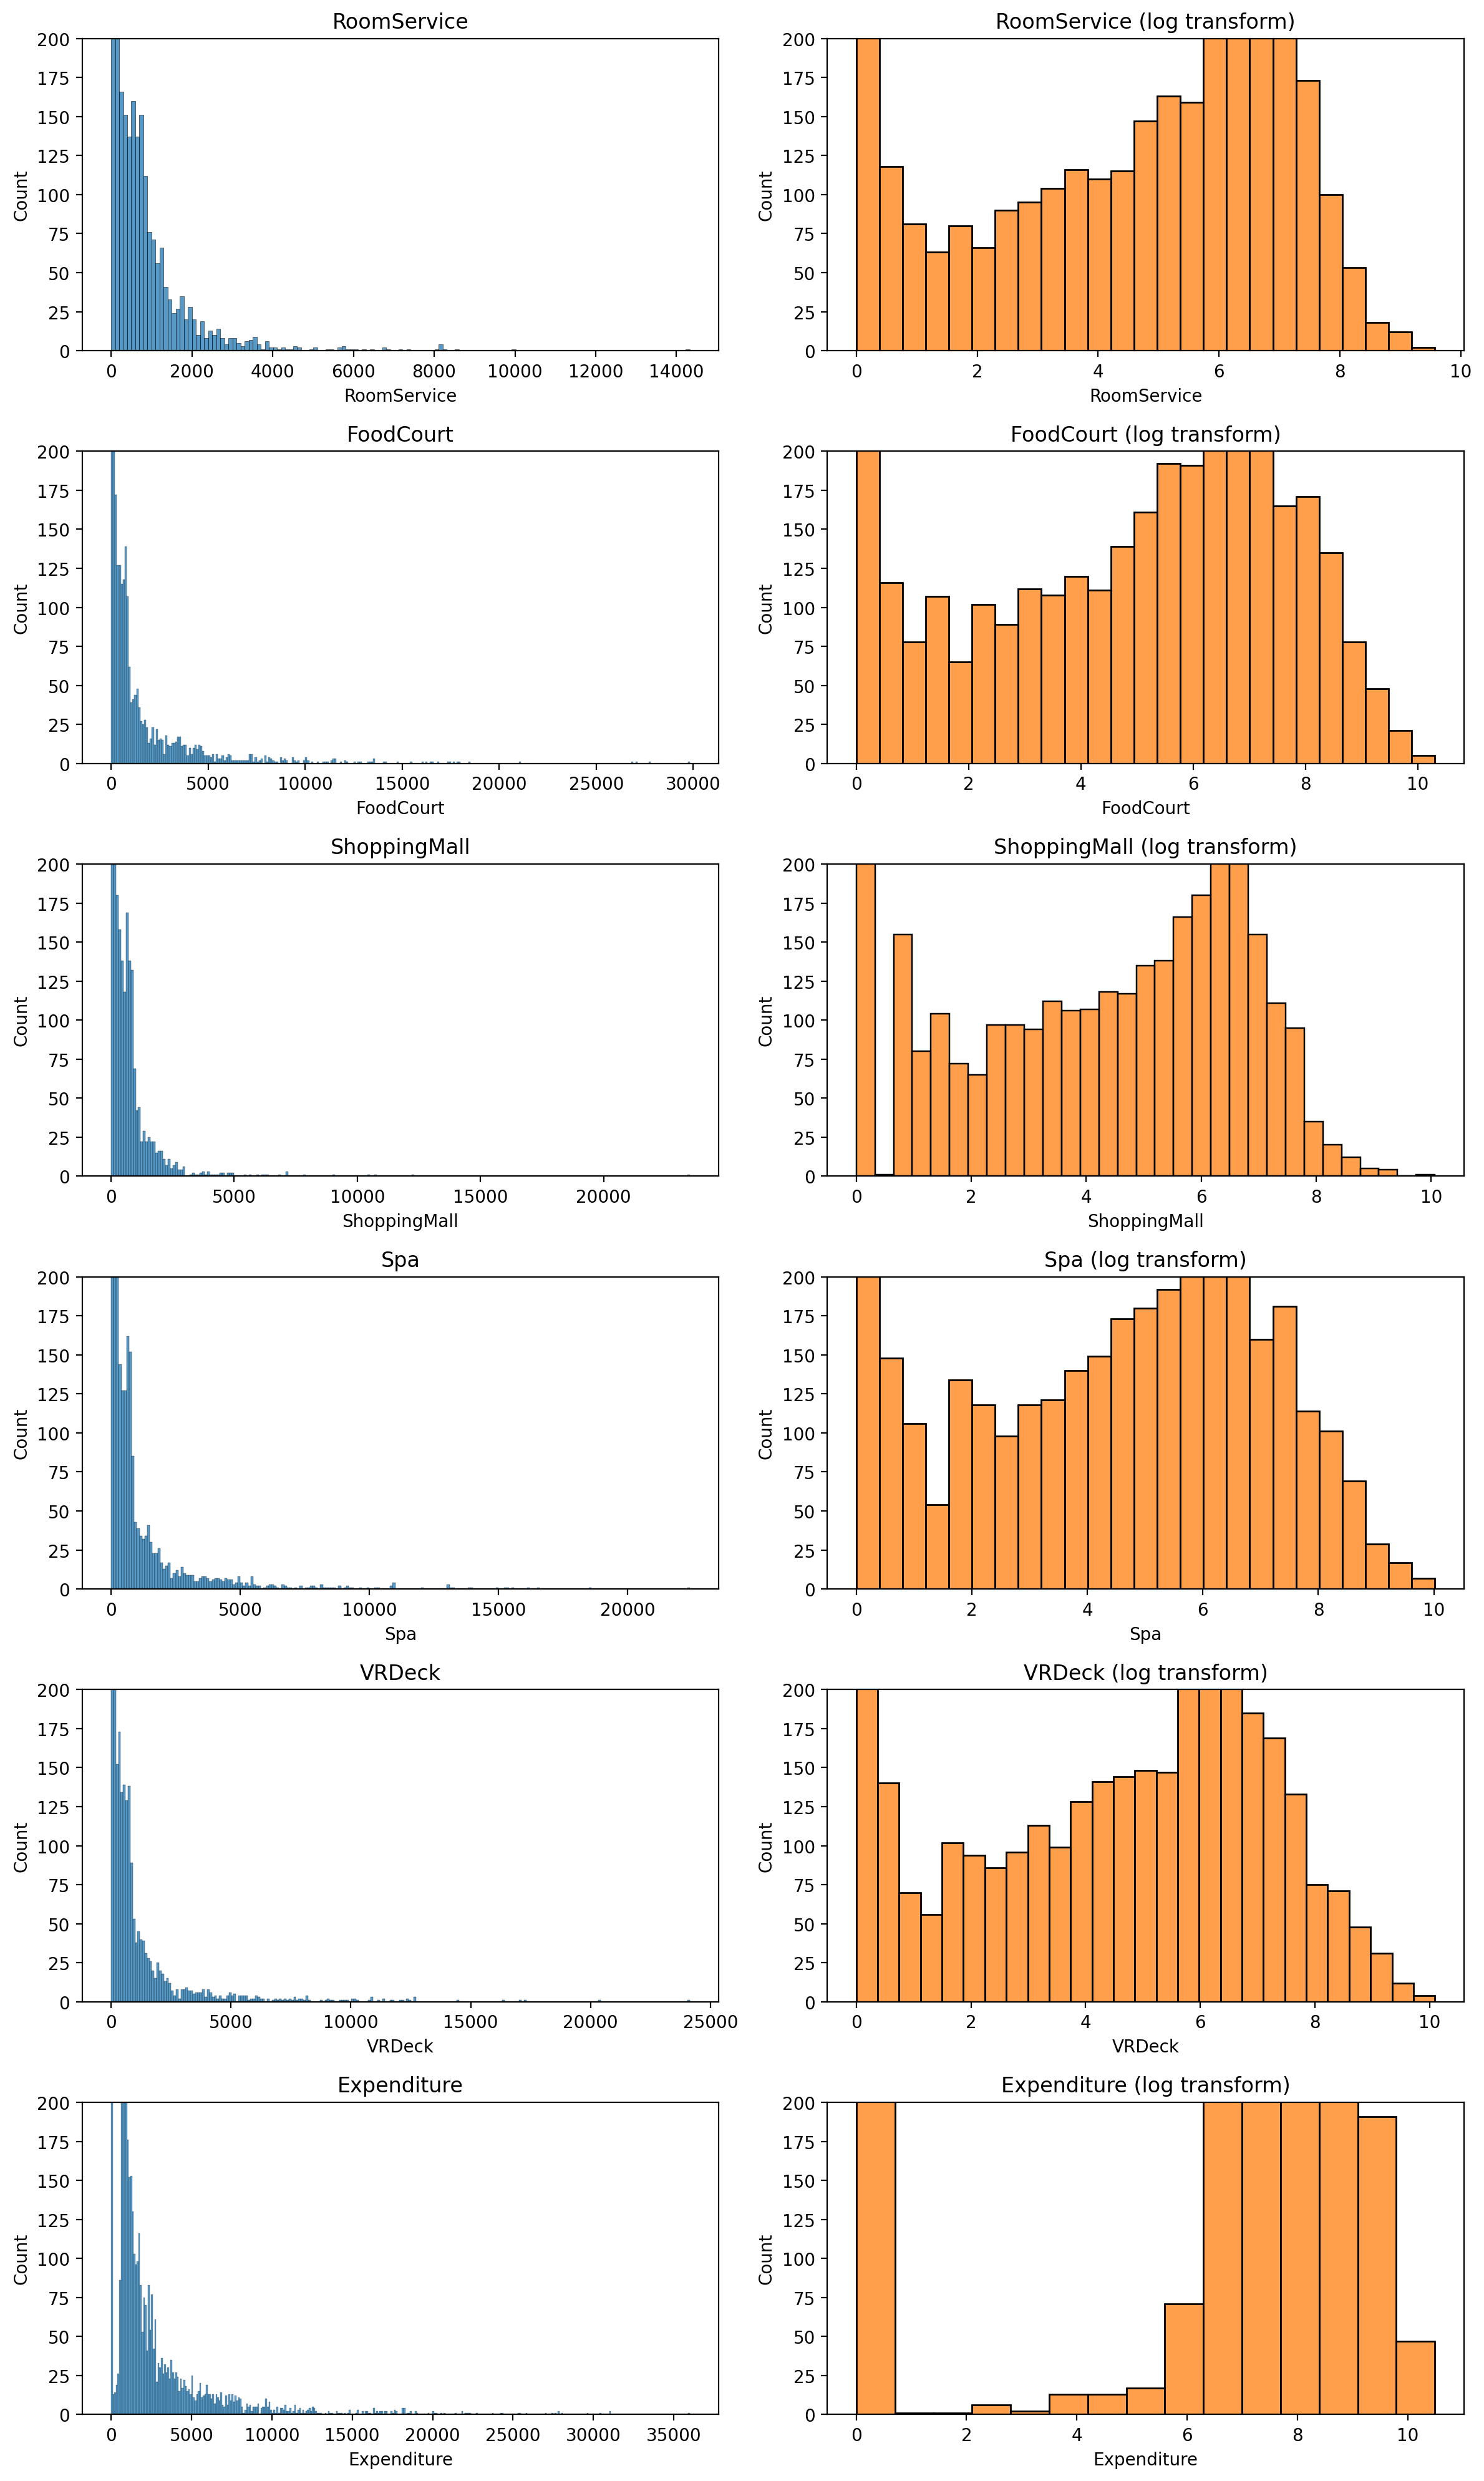

In [19]:
# 準備需要轉換的特徵
log_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']

# 將欄位完全轉換成數值型態以便np.log1p可以計算
X[log_cols] = X[log_cols].apply(lambda x: pd.to_numeric(x))

# 繪製轉換前和轉換後的分佈圖
fig = plt.figure(figsize = (12, 20))
for i, col in enumerate(log_cols):
    plt.subplot(6, 2, i * 2 + 1)
    sns.histplot(X[col], binwidth = 100)
    plt.ylim([0, 200])
    plt.title(col)

    plt.subplot(6, 2, i * 2 + 2)
    sns.histplot(np.log1p(X[col]), color = 'C1')
    plt.ylim([0, 200])
    plt.title(f"{col} (log transform)")
fig.tight_layout()

In [20]:
# 進行對數轉換
test[log_cols] = test[log_cols].apply(lambda x: pd.to_numeric(x)) 

for col in log_cols:
    X[col] = np.log1p(X[col])
    test[col] = np.log1p(test[col])

## 進行標準化與One-hot編碼

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 區分數值型欄位與類別型欄位
num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
cat_cols = ['HomePlanet', 'Destination', 'Age_Group', 'Cabin_deck', 'Cabin_side']
passthrough_cols = ['CryoSleep', 'VIP', 'No_spending', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4',
       'Cabin_region5', 'Cabin_region6']

# 使用ColumnTransformer組合不同型別欄位的處理方法
ct = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False, dtype = int), cat_cols), 
    ('pass', 'passthrough', passthrough_cols)
])

X_processed = ct.fit_transform(X)  # 取得處理後的欄位名稱
col_names = num_cols + list(ct.named_transformers_['cat'].get_feature_names_out(cat_cols)) + passthrough_cols
X_processed = pd.DataFrame(X_processed, columns = col_names)

test_processed = ct.transform(test)
test_processed = pd.DataFrame(test_processed, columns = col_names)

X = X_processed.astype(float)
test = test_processed.astype(float)

## 模型選擇
---
### 資料切割

In [22]:
from sklearn.model_selection import train_test_split

# 將資料分成訓練集與驗證集
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify = y,
                                                      test_size = 0.2)

### 模型準備與參數設定

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# 定義模型
classifiers = {
    "LogisticRegression": LogisticRegression(random_state = 0),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(random_state = 0),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(random_state = 0),
    "LGBM": LGBMClassifier(random_state = 0, verbose = -1),
    "CatBoost": CatBoostClassifier(random_state = 0, verbose = False)
}

# 定義所有模型的各種超參數組合
LR_grid = {'penalty': ['l1', 'l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5], 
           'max_iter': [50, 100, 150]} 

KNN_grid = {'n_neighbors': [3, 5, 7, 9]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5], 
            'kernel': ['linear', 'rbf'], 
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300], 
           'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200], 
                'max_depth': [4, 8, 12], 
                'learning_rate': [0.05, 0.1, 0.15]}

# 將所有網格整理成字典以便後續處理
grid = {
    'LogisticRegression': LR_grid, 
    'KNN': KNN_grid, 
    'SVC': SVC_grid, 
    'RandomForest': RF_grid, 
    'XGBoost': boosted_grid, 
    'LGBM': boosted_grid,
    'CatBoost': boosted_grid
}

### 模型訓練與網格搜索

In [24]:
i = 0
clf_best_params = classifiers.copy()
valid_scores = pd.DataFrame({
    'Classifier': classifiers.keys(), 
    'Validation score': np.zeros(len(classifiers))
})

for key, classifier in classifiers.items():
    
    print(classifier.__class__.__name__, '正在訓練中......')
    # 對模型逐一進行網格搜索與交叉驗證
    clf = GridSearchCV(estimator = classifier, param_grid = grid[key], n_jobs = -1, cv = 5)

    # 訓練模型並將成績存回Df
    clf.fit(X_train, y_train)
    valid_scores.iloc[i, 1] = clf.score(X_valid, y_valid)

    # 儲存模型的最佳參數
    clf_best_params[key] = clf.best_params_

    print(classifier.__class__.__name__, "訓練完畢")
    i += 1

LogisticRegression 正在訓練中......


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

LogisticRegression 訓練完畢
KNeighborsClassifier 正在訓練中......
KNeighborsClassifier 訓練完畢
SVC 正在訓練中......
SVC 訓練完畢
RandomForestClassifier 正在訓練中......
RandomForestClassifier 訓練完畢
XGBClassifier 正在訓練中......
XGBClassifier 訓練完畢
LGBMClassifier 正在訓練中......
LGBMClassifier 訓練完畢
CatBoostClassifier 正在訓練中......
CatBoostClassifier 訓練完畢


### 觀察結果

In [25]:
# 觀察每個模型對於驗證集的準確率
valid_scores

,Classifier,Validation score
0,LogisticRegression,0.771133
1,KNN,0.783209
2,SVC,0.796435
3,RandomForest,0.805635
4,XGBoost,0.818286
5,LGBM,0.820587
6,CatBoost,0.824612


In [26]:
# 觀察每個模型的最佳參數
clf_best_params

{'LogisticRegression': {'C': 1, 'max_iter': 50, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9},
 'SVC': {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 10, 'n_estimators': 300},
 'XGBoost': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100},
 'LGBM': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 200}}

### 集成式學習

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# 用投票法來觀察結果
xgb = XGBClassifier(**clf_best_params['XGBoost'])
lgbm = LGBMClassifier(**clf_best_params['LGBM'], verbose = -1)
cat = CatBoostClassifier(**clf_best_params['CatBoost'], verbose = False)

# 用軟投票來決定結果
voting_clf = VotingClassifier(
    estimators = [('xgb', xgb), ('lgbm', lgbm), ('cat', cat)],
    voting = 'soft', 
)

voting_clf.fit(X_train, y_train)

# 使用分層交叉驗證法
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_score = cross_val_score(voting_clf, X_train, y_train, cv = skf, scoring = 'accuracy')

y_pred = voting_clf.predict(X_valid)
valid_score = accuracy_score(y_valid, y_pred)

print("train accuracy：", np.round(cv_score.mean(), 5) * 100)
print("valid accuracy：", np.round(valid_score, 5) * 100)

train accuracy： 80.673
valid accuracy： 81.714


In [28]:
# 用Stacking來觀察結果
base_classifiers = [
    ('xgb', xgb), ('lgbm', lgbm), ('cat', cat)
]

final_classifier = LogisticRegression()

stacking_clf = StackingClassifier(estimators = base_classifiers, 
                                  final_estimator = final_classifier, 
                                  cv = 5)
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_valid)
valid_score = accuracy_score(y_valid, y_pred)

cv_score = cross_val_score(stacking_clf, X_train, y_train, cv = skf, scoring = 'accuracy')

print("Stacking train：", np.round(cv_score.mean(), 5) * 100)
print("Stacking valid：", np.round(valid_score, 5) * 100)

Stacking train： 80.975
Stacking valid： 82.116


## 提交結果

In [41]:
predictions = stacking_clf.predict(test)
predictions_boos = predictions.astype(bool)
predictions_boos

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:PassengerId: object, HomePlanet: object, CryoSleep: object, Cabin: object, Destination: object, VIP: object, Name: object

In [40]:
test = pd.read_csv('space_titanic_test.csv')
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Transported': predictions_bool
})

NameError: name 'predictions_bool' is not defined